<a href="https://colab.research.google.com/github/rsivs/MachineHack/blob/master/pregnancy_risk_prediction_xgbclassifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [16]:
import pandas as pd
import numpy as np

In [17]:
# Load the data
baby_data_clf=pd.read_csv('baby-weights-dataset2.csv') 


In [18]:
print(baby_data_clf.head(2))

     ID  SEX  MARITAL  FAGE  GAINED  ...  PRETERM  RENAL  RHSEN  UTERINE  BWEIGHT
0  2001    2        1    33      26  ...        0      0      0        0   4.3750
1  2002    2        2    19      40  ...        0      0      0        0   6.9375

[2 rows x 37 columns]


In [19]:
def process_bweight(x):
  if x > 5.5:
    return 0
  elif x < 3.5:
    return 2 
  else:
    return 1 

baby_data_clf["BWEIGHT"] = baby_data_clf["BWEIGHT"].apply(lambda x : process_bweight(x))

In [20]:
print(baby_data_clf.head(10))

     ID  SEX  MARITAL  FAGE  GAINED  ...  PRETERM  RENAL  RHSEN  UTERINE  BWEIGHT
0  2001    2        1    33      26  ...        0      0      0        0        1
1  2002    2        2    19      40  ...        0      0      0        0        0
2  2003    2        1    33      16  ...        0      0      0        0        0
3  2004    1        1    25      40  ...        0      0      0        0        0
4  2005    1        2    21      60  ...        0      0      0        0        0
5  2006    1        1    21      30  ...        0      0      0        0        0
6  2007    1        2    29      20  ...        0      0      0        0        0
7  2008    2        2    23      41  ...        0      0      0        0        0
8  2009    2        1    27       0  ...        0      0      0        0        0
9  2010    1        1    30      30  ...        0      0      0        0        0

[10 rows x 37 columns]


In [27]:
y_data = baby_data_clf["BWEIGHT"]
x_data = baby_data_clf.drop(['ID', 'BWEIGHT', 'SEX'], axis=1)

In [28]:
x_data_dummies = pd.get_dummies(data=x_data, columns=['HISPMOM', 'HISPDAD'])

In [29]:
x_data_dummies.head()

,MARITAL,FAGE,GAINED,VISITS,MAGE,FEDUC,MEDUC,TOTALP,BDEAD,TERMS,LOUTCOME,WEEKS,RACEMOM,RACEDAD,CIGNUM,DRINKNUM,ANEMIA,CARDIAC,ACLUNG,DIABETES,HERPES,HYDRAM,HEMOGLOB,HYPERCH,HYPERPR,ECLAMP,CERVIX,PINFANT,PRETERM,RENAL,RHSEN,UTERINE,HISPMOM_C,HISPMOM_M,HISPMOM_N,HISPMOM_O,HISPMOM_P,HISPMOM_S,HISPMOM_U,HISPDAD_C,HISPDAD_M,HISPDAD_N,HISPDAD_O,HISPDAD_P,HISPDAD_S,HISPDAD_U
0,1,33,26,10,34,12,4,2,0,0,1,35,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0
1,2,19,40,10,18,11,12,1,0,0,9,41,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0
2,1,33,16,14,31,16,16,2,0,0,1,39,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0
3,1,25,40,15,28,12,12,3,0,0,1,38,8,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0
4,2,21,60,13,20,12,14,2,0,0,1,40,2,2,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0


In [30]:
# Import SelectKBest, chi2(score function for classification), f_regression (score function for regression)
from sklearn.feature_selection import SelectKBest, chi2, f_regression
# Create the object for SelectKBest and fit and transform the classification data
# k is the number of features you want to select [here it's 10]
x_data_clf_fs=SelectKBest(score_func=chi2,k=10).fit_transform(x_data_dummies,y_data)

In [31]:
print(x_data_clf_fs[:5])

[[26 10  0 35  0  0  0  0  0  0]
 [40 10  0 41  0  0  0  0  0  0]
 [16 14  0 39  0  0  0  0  0  0]
 [40 15  0 38  0  0  0  0  0  0]
 [60 13  0 40  0  1  0  0  0  0]]


In [32]:
baby_data_clf.BWEIGHT.value_counts()

0    93242
1     6464
2     1694
Name: BWEIGHT, dtype: int64

In [33]:
skewness = baby_data_clf.BWEIGHT.skew()
print("Skewness: %f" % skewness)
kurtosis = baby_data_clf.BWEIGHT.kurt()
print("Kurtosis: %f" % kurtosis)

Skewness: 3.823026
Kurtosis: 14.819809


In [35]:
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score
from sklearn.metrics import confusion_matrix, roc_auc_score, roc_curve, classification_report, precision_recall_curve
from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold, GridSearchCV, RandomizedSearchCV

from collections import Counter

In [36]:
# Splitting the data into train and test
X_train,X_test,y_train,y_test=train_test_split(x_data_dummies, y_data, train_size=0.8, stratify = y_data, random_state=100)

In [57]:
from imblearn.combine import SMOTEENN

counter = Counter(y_train)
print('Before',counter)
# oversampling the train dataset using SMOTE + ENN
smenn = SMOTEENN()
X_train_smenn, y_train_smenn = smenn.fit_resample(X_train, y_train)

counter = Counter(y_train_smenn)
print('After',counter)

/usr/local/lib/python3.6/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


Before Counter({0: 74594, 1: 5171, 2: 1355})


/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarni

After Counter({2: 74380, 1: 72605, 0: 56792})


/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


In [64]:
print(X_train_smenn)

[[ 1 39 30 ...  0  0  0]
 [ 1 29 21 ...  0  0  0]
 [ 1 35 30 ...  0  0  0]
 ...
 [ 1 29 30 ...  0  0  0]
 [ 2 28 13 ...  0  0  0]
 [ 1 31 10 ...  0  0  0]]


In [65]:
list(X_train.columns) 

['MARITAL',
 'FAGE',
 'GAINED',
 'VISITS',
 'MAGE',
 'FEDUC',
 'MEDUC',
 'TOTALP',
 'BDEAD',
 'TERMS',
 'LOUTCOME',
 'WEEKS',
 'RACEMOM',
 'RACEDAD',
 'CIGNUM',
 'DRINKNUM',
 'ANEMIA',
 'CARDIAC',
 'ACLUNG',
 'DIABETES',
 'HERPES',
 'HYDRAM',
 'HEMOGLOB',
 'HYPERCH',
 'HYPERPR',
 'ECLAMP',
 'CERVIX',
 'PINFANT',
 'PRETERM',
 'RENAL',
 'RHSEN',
 'UTERINE',
 'HISPMOM_C',
 'HISPMOM_M',
 'HISPMOM_N',
 'HISPMOM_O',
 'HISPMOM_P',
 'HISPMOM_S',
 'HISPMOM_U',
 'HISPDAD_C',
 'HISPDAD_M',
 'HISPDAD_N',
 'HISPDAD_O',
 'HISPDAD_P',
 'HISPDAD_S',
 'HISPDAD_U']

In [66]:
column_names = ['MARITAL',
 'FAGE',
 'GAINED',
 'VISITS',
 'MAGE',
 'FEDUC',
 'MEDUC',
 'TOTALP',
 'BDEAD',
 'TERMS',
 'LOUTCOME',
 'WEEKS',
 'RACEMOM',
 'RACEDAD',
 'CIGNUM',
 'DRINKNUM',
 'ANEMIA',
 'CARDIAC',
 'ACLUNG',
 'DIABETES',
 'HERPES',
 'HYDRAM',
 'HEMOGLOB',
 'HYPERCH',
 'HYPERPR',
 'ECLAMP',
 'CERVIX',
 'PINFANT',
 'PRETERM',
 'RENAL',
 'RHSEN',
 'UTERINE',
 'HISPMOM_C',
 'HISPMOM_M',
 'HISPMOM_N',
 'HISPMOM_O',
 'HISPMOM_P',
 'HISPMOM_S',
 'HISPMOM_U',
 'HISPDAD_C',
 'HISPDAD_M',
 'HISPDAD_N',
 'HISPDAD_O',
 'HISPDAD_P',
 'HISPDAD_S',
 'HISPDAD_U']

In [67]:
# creating the dataframe 
X_train_bal = pd.DataFrame(data = X_train_smenn,  
                             columns = column_names) 

In [73]:
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score
model = XGBClassifier() 

model.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='multi:softprob', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [74]:
y_pred = model.predict(X_test) 

predictions = [round(value) for value in y_pred]

accuracy = accuracy_score(y_test, predictions) 

print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 93.70%


In [75]:
from sklearn.metrics import classification_report, confusion_matrix

print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.95      0.99      0.97     18648
           1       0.55      0.24      0.34      1293
           2       0.80      0.66      0.73       339

    accuracy                           0.94     20280
   macro avg       0.77      0.63      0.68     20280
weighted avg       0.92      0.94      0.93     20280



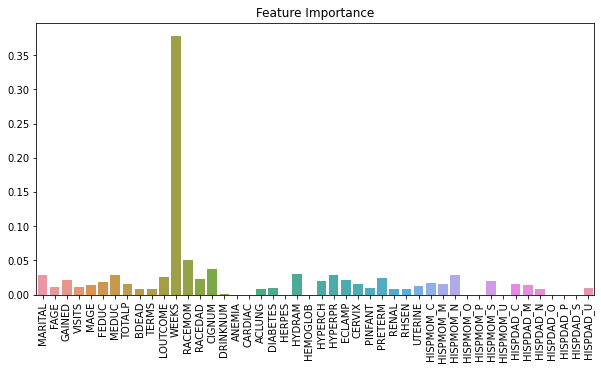

In [76]:
f, ax = plt.subplots(figsize=(10,5))
plot = sns.barplot(x=column_names, y=model.feature_importances_)
ax.set_title('Feature Importance')
plot.set_xticklabels(plot.get_xticklabels(),rotation='vertical')
plt.show()